In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [2]:
import sklearn as sk, seaborn as sns

In [3]:
data = pd.read_csv(r"D:\Chrome (Downloads)\assignment_1\usa_housing_training.csv", header = 0)
data.head()

,avg_area_income,avg_house_age,avg_nb_rooms,avg_nb_bathrooms,area_population,house_price,address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4034 entries, 0 to 4033
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   avg_area_income   4034 non-null   float64
 1   avg_house_age     4034 non-null   float64
 2   avg_nb_rooms      4034 non-null   float64
 3   avg_nb_bathrooms  4034 non-null   float64
 4   area_population   4034 non-null   float64
 5   house_price       4034 non-null   float64
 6   address           4034 non-null   object 
dtypes: float64(6), object(1)
memory usage: 220.7+ KB


This ensures there are no Null / NaN values present in the data set thus, assuming the data to be clean.

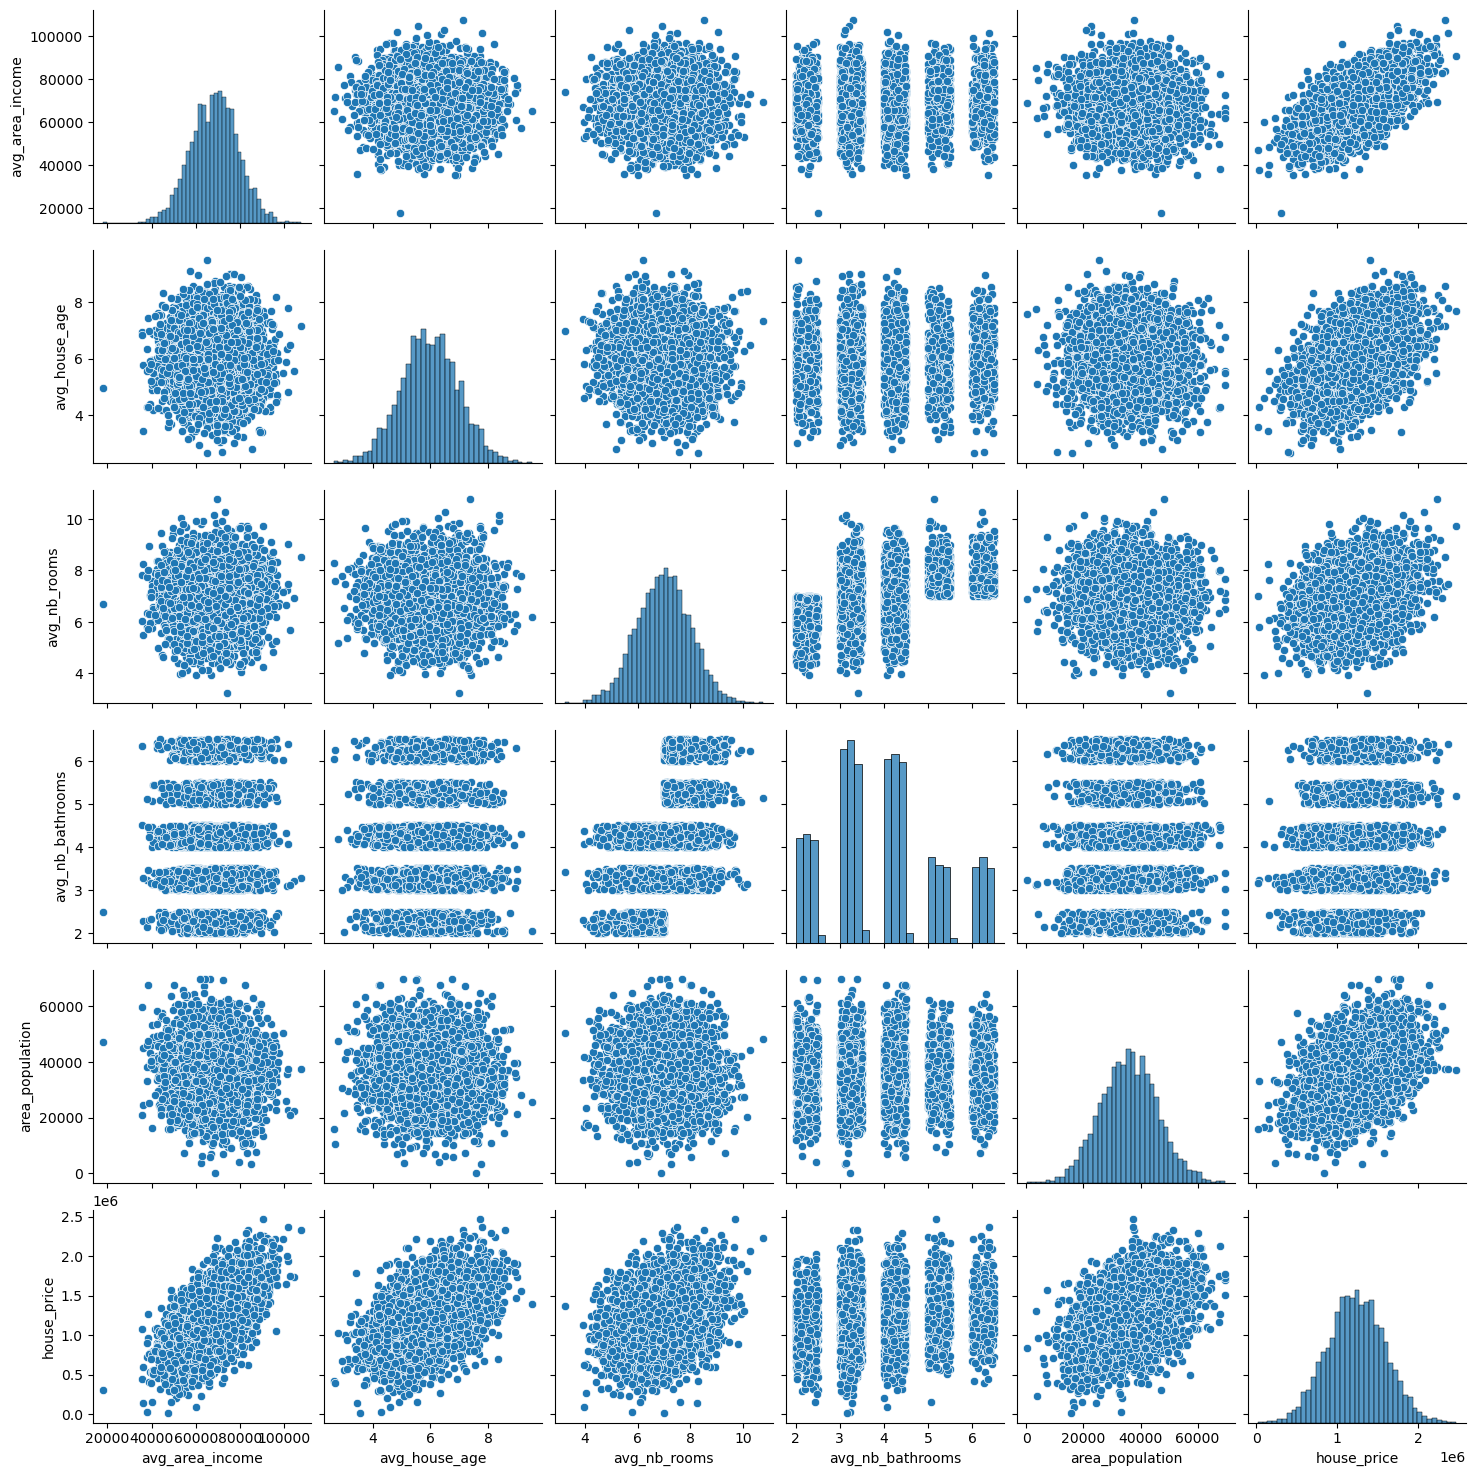

In [5]:
sns.pairplot(data)

All of the variables other than 'No. of bathrooms' seem to have some form of linear relationship with the pricing of the house.

In [6]:
data.columns

Index(['avg_area_income', 'avg_house_age', 'avg_nb_rooms', 'avg_nb_bathrooms',
       'area_population', 'house_price', 'address'],
      dtype='object')

In [7]:
X = data.area_population
Y = data.house_price

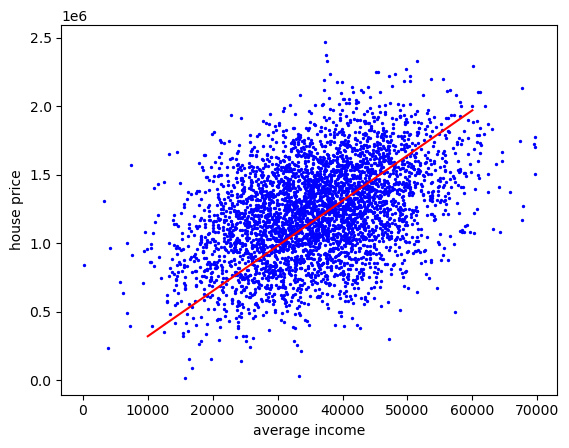

In [8]:
phi0 = -10000
phi1 = 33
x = np.array(range(10000, 60000)) # this creates a Numpy array from the sequence: 30000, 30001, 30002, ... 99999
y = phi1 * x + phi0 # this creates a Numpy array whose values are the mapping of x's values

# Draw the scatter plot along with the straight line
plt.scatter(X, Y, c='blue', s=2)
plt.plot(x, y, '-r') # draw the red straight line
plt.xlabel('average income')
plt.ylabel('house price')
plt.show()

In [9]:
# (pred - act)^2 = pred^2 + act^2 - 2*pred*act 
def cost_mse(actual,predicted):
    M = len(actual)
    semi_cost = (predicted*predicted) + (actual*actual) - (2*predicted*actual)
    semi_cost = np.sum(semi_cost)
    cost = semi_cost / M
    return cost


In [10]:
actual = Y.to_numpy() # Must convert it into Numpy array
predicted = phi1 * X.to_numpy() + phi0

cost = cost_mse(actual, predicted)
print("Cost value = ", cost)

Cost value =  142402851857.4162


No. of bedrooms will need dummy variables but to do so, avg shpuld be converted to the ints (1,2,3,etc). But on second thoughts the average number of rooms and bathrooms are in a way encapsulating the data for the whole area and not for a single property thus, changing (rounding it might deprive the model of the efficiency that it may provide otherwise).





The data need to be rescaled.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [12]:
pass_data = data.drop('address', axis = 1)

In [13]:
pass_data.head()

,avg_area_income,avg_house_age,avg_nb_rooms,avg_nb_bathrooms,area_population,house_price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [14]:
train, test = train_test_split(pass_data, train_size = 0.7, random_state = 1)

In [15]:
print(train.shape)
print(test.shape)

(2823, 6)
(1211, 6)


In [16]:
scaler = MinMaxScaler()

In [17]:
to_be_scaled = ['avg_area_income','avg_house_age','avg_nb_rooms','avg_nb_bathrooms','area_population']

train[to_be_scaled] = scaler.fit_transform(train[to_be_scaled])

In [18]:
train.head()

,avg_area_income,avg_house_age,avg_nb_rooms,avg_nb_bathrooms,area_population,house_price
2570,0.484354,0.467674,0.480262,0.997778,0.457454,1.209798e+06
2700,0.651130,0.602852,0.325315,0.257778,0.294621,1.161233e+06
304,0.577344,0.752393,0.494956,0.895556,0.234899,1.137802e+06
3171,0.627996,0.317018,0.444668,0.477778,0.360035,6.997873e+05
2642,0.506184,0.645829,0.279363,0.482222,0.332387,7.455866e+05


In [19]:
y_train = train.pop('house_price')
X_train = train

In [20]:
import statsmodels.api as sm

In [21]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            house_price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     6400.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:23:47   Log-Likelihood:                -36559.
No. Observations:                2823   AIC:                         7.313e+04
Df Residuals:                    2817   BIC:                         7.317e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.281e+06   1.42e+04    -90.094      0.000   -1.31e+06   -1.25e+06
avg_area_income    1.83e+06   1.52e+04    120.605      0.000     1.8e+06    1.86e+06
avg_house_age     1.141e+06   1.32e+04     86.350      0.000    1.11e+06    1.17e+06
avg_nb_rooms      8.169e+05   1.47e+04     55.512      0.000    7.88e+05    8.46e+05
avg_nb_bathrooms  1.075e+04   8014.208      1.341      0.180   -4968.726    2.65e+04
area_population    1.01e+06   1.27e+04     79.411      0.000    9.85e+05    1.04e+06
==============================================================================
Omnibus:                        5.281   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.541
Skew:                           0.015   Prob(JB):                        0.103
Kurtosis:                       2.806   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r2 value is decent and the significance of each variable is high alng with the overall efficiancy of the model. 

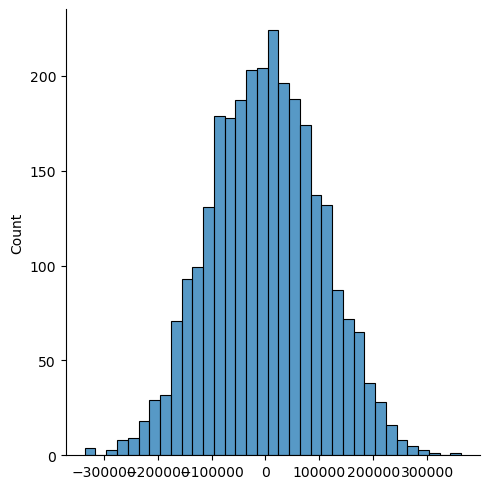

In [30]:
y_train_pred = lr_model.predict(X_train_sm)

res = y_train - y_train_pred

sns.displot(res)
plt.show()

In [22]:
test.head()

,avg_area_income,avg_house_age,avg_nb_rooms,avg_nb_bathrooms,area_population,house_price
2421,81248.196972,7.939004,6.749489,4.25,48922.521400,1.969257e+06
2387,72531.133802,4.661802,6.498815,4.18,15167.411071,5.781615e+05
2713,70604.490327,5.682477,7.333735,4.42,26529.698857,1.076996e+06
2851,66889.099406,7.079594,5.153575,4.19,20501.005817,8.435362e+05
3072,80898.972156,5.559223,6.801836,4.37,37530.431391,1.443470e+06


In [23]:
test[to_be_scaled] = scaler.fit_transform(test[to_be_scaled])
y_test = test.pop('house_price')
X_test = test

In [24]:
X_test.head()

,avg_area_income,avg_house_age,avg_nb_rooms,avg_nb_bathrooms,area_population
2421,0.631250,0.816960,0.498776,0.500000,0.702252
2387,0.509738,0.311295,0.463189,0.484444,0.216003
2713,0.482882,0.468783,0.581721,0.537778,0.379679
2851,0.431091,0.684355,0.272207,0.486667,0.292834
3072,0.626382,0.449765,0.506208,0.526667,0.538146


In [31]:
y_test.head()

2421    1.969257e+06
2387    5.781615e+05
2713    1.076996e+06
2851    8.435362e+05
3072    1.443470e+06
Name: house_price, dtype: float64

In [25]:
X_test_sm = sm.add_constant(X_test)

In [26]:
y_test_pred = lr_model.predict(X_test_sm)

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7476660696066222